In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [3]:
# Load data
data = pd.read_csv('/content/shipwreck.csv')

In [4]:
data.head()

,#,Site,Original Name,Depth (m),Sank On,Administrative District
0,1,SL/W/PANA/M/02,Panadura Boiler Wreck 02 (Northeast Wreck),5,NaN,Colombo
1,2,SL/W/COLO/M/13,Lotus Barge,26,NaN,Colombo
2,3,SL/W/COLO/M/14,Wallet Wreck,35,NaN,Colombo
3,4,SL/W/COLO/M/15,SS Perseus,38,1917.0,Colombo
4,5,SL/W/COLO/M/03,Moratuwa Gun Boat,13,NaN,Colombo


In [5]:
# Drop duplicates
data.drop_duplicates(inplace=True)

In [6]:
# Drop rows with missing depth values
data = data.dropna(subset=['Depth (m)'])

In [7]:
# Fill missing values for non-numerical columns if needed
data.fillna(method='ffill', inplace=True)

In [8]:
# Select relevant feature
x = data[['Depth (m)']]

In [9]:
#Data Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=42)

In [11]:
# Predict cluster labels
pred = kmeans.predict(x_scaled)

In [12]:
silhouette_avg = silhouette_score(x_scaled, pred)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.709


In [13]:
# Add cluster column to the original data
data['Cluster'] = pred

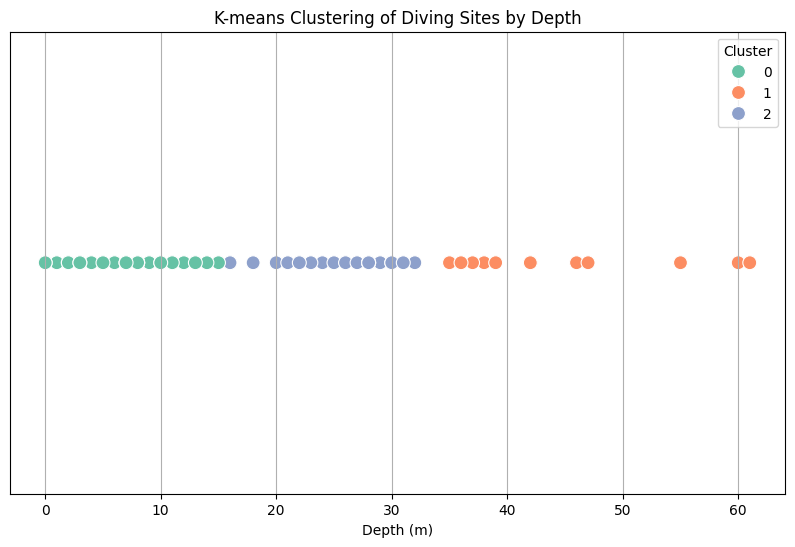

In [14]:
# Scatter plot of clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depth (m)', y=[0]*len(x), hue='Cluster', data=data, palette='Set2', s=100)
plt.title('K-means Clustering of Diving Sites by Depth')
plt.xlabel('Depth (m)')
plt.yticks([])
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

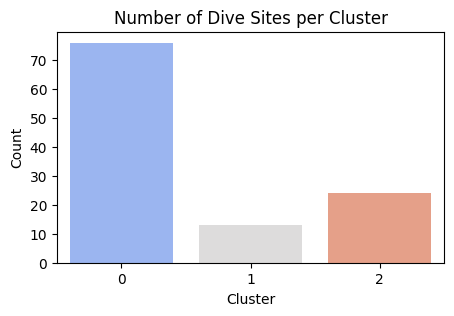

In [21]:
# Cluster distribution heatmap
plt.figure(figsize=(5, 3))
sns.countplot(x='Cluster', data=data, palette='coolwarm')
plt.title('Number of Dive Sites per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

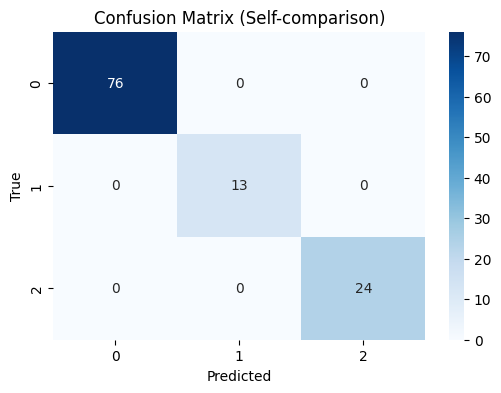

In [17]:
# Confusion matrix
conf_mat = confusion_matrix(data['Cluster'], pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Self-comparison)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [18]:
# --- Diving Suggestion Function ---
def suggest_diving_areas(experience_level):
    if experience_level.lower() == 'beginner':
        cluster = 0
    elif experience_level.lower() == 'intermediate':
        cluster = 1
    elif experience_level.lower() == 'pro':
        cluster = 2
    else:
        return 'Error: Invalid experience level'

    suggested_areas = data[data['Cluster'] == cluster][['Site', 'Original Name', 'Depth (m)', 'Administrative District']]
    return suggested_areas

In [19]:
# Example usage
print("\nSuggested areas for beginners:")
print(suggest_diving_areas('beginner'))



Suggested areas for beginners:
                Site                               Original Name  Depth (m)  \
0     SL/W/PANA/M/02  Panadura Boiler Wreck 02 (Northeast Wreck)          5   
4     SL/W/COLO/M/03                           Moratuwa Gun Boat         13   
5     SL/W/NEGO/M/22                          Kapumgoda wreck 01          3   
6     SL/W/COLO/M/04                       MV Thermopylae Sierra          6   
15    SL/S/LBAS/M/01                         Little Basses wreck          5   
..               ...                                         ...        ...   
103   SL/N/MULA/M/11                                   New Wreck          0   
109  SL/NW/PUTL/M/02                              WW II Aircraft          4   
110  SL/NW/PUTL/M/03                              WW II Aircraft          3   
111   SL/W/COLO/M/28                                     Unknown          5   
112   SL/W/COLO/M/29                                     Unknown          3   

    Administrative 

In [20]:

# Save the model and scaler
joblib.dump(kmeans, 'ruindiv.pkl')
joblib.dump(scaler, 'scaler_ruindiv.pkl')


['scaler_ruindiv.pkl']